In [ ]:
🧭 Introduction: Nonlinear 1D Wave Simulation

This project models the time evolution of a nonlinear one-dimensional (1D) oscillator chain, a system that arises in many areas of physics and engineering. Specifically, we simulate a field P(x,t), governed by a second-order spatially discretized differential equation:

\frac{d^2P}{dt^2} = -\frac{1}{\rho} \left( \alpha P + \beta P^3 + k(2P - P_{\text{left}} - P_{\text{right}}) \right) + S(t)

Where:
	•	P(x, t): field at position x and time t
	•	\alpha: linear stiffness coefficient
	•	\beta: nonlinear stiffness coefficient
	•	k: coupling constant between neighboring sites
	•	\rho: density or inertia factor
	•	S(t): optional external source term

This system can represent:
	•	Wave propagation in nonlinear elastic materials
	•	Charge transmission in discrete electrical chains
	•	Pressure or displacement waves in a constrained medium
	•	Even simplified toy models for seismic or biological transport systems

We use the Runge-Kutta 4th-order method (RK4) to integrate the dynamics, ensuring stability and accuracy.

⸻

🎯 What We Did
	•	Initialized the system with a Gaussian wave packet, centered in the middle of the 1D domain
	•	Added optional sinusoidal driving force at the center to simulate external energy injection
	•	Evolved the system using RK4 time integration for 50,000 time steps
	•	Explored two main quantities:
	•	📈 The average field over time — to observe dissipation or buildup
	•	🌊 The spatial field profile at a fixed late time — to observe how waves spread or focus

⸻

🔬 What We Found
	•	The initial wave packet disperses and reflects off the fixed boundaries.
	•	Without forcing, the system gradually loses energy due to the nonlinear restoring forces — visible as decay in the mean value of P.
	•	With the external sinusoidal source:
	•	The wave structure persists longer and may grow, depending on source strength and frequency.
	•	You can observe resonant build-up or oscillatory decay depending on parameter choice.
	•	The final field profile often shows a standing wave or decaying wave packet, shaped by nonlinearity and boundary effects.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# --- Physical constants ---
alpha = -1.1294e8   # linear stiffness
beta  = -2.28235e9  # nonlinear stiffness
k     = 1e11        # spring constant (coupling)
rho   = 1e10        # effective density (mass per site)

# --- Simulation grid ---
Nx = 100            # number of spatial points
Nt = 50000          # number of time steps
dt = 0.05           # time step size

# --- Time and space arrays ---
t_vals = np.linspace(0, dt * Nt, Nt)
x_vals = np.arange(Nx)

# --- Initial condition: Gaussian wave packet ---
P = np.zeros((Nt, Nx))
x_pos = np.linspace(0, 1, Nx)
P[0, :] = 0.2 * np.exp(-((x_pos - 0.5)**2) / (2 * 0.1**2))  # Gaussian bump

# --- Fixed boundary conditions ---
P[:, 0] = 0.0       # left end fixed
P[:, -1] = -0.1     # right end fixed

In [3]:
def compute_rhs(x_center, x_left, x_right, t=0, src_amp=0.0, src_range=None, i=None):
    """
    Computes the right-hand side of the evolution equation.
    Optionally adds a sinusoidal source term at a location.
    """
    source = 0.0
    if src_range and i is not None and src_range[0] <= i <= src_range[1]:
        source = src_amp * np.sin(2 * np.pi * t / 1000)

    return -(alpha * x_center + beta * x_center**3 + k * (2 * x_center - x_left - x_right)) / rho + source

In [4]:
# Define external driving parameters
source_range = (Nx//2 - 1, Nx//2 + 1)  # centered source location
source_amp = 1e7                      # source strength

# Run simulation using RK4
for j in tqdm(range(1, Nt)):
    for i in range(1, Nx - 1):
        t = j * dt

        k1 = dt * compute_rhs(P[j-1, i], P[j-1, i-1], P[j-1, i+1], t, source_amp, source_range, i)
        k2 = dt * compute_rhs(P[j-1, i] + 0.5*k1, P[j-1, i-1], P[j-1, i+1], t, source_amp, source_range, i)
        k3 = dt * compute_rhs(P[j-1, i] + 0.5*k2, P[j-1, i-1], P[j-1, i+1], t, source_amp, source_range, i)
        k4 = dt * compute_rhs(P[j-1, i] + k3, P[j-1, i-1], P[j-1, i+1], t, source_amp, source_range, i)

        P[j, i] = min(0.2, P[j-1, i] + (k1 + 2*k2 + 2*k3 + k4) / 6)

 20%|███████                             | 9887/49999 [00:05<00:22, 1791.39it/s]/var/folders/4n/mv7_dxg12q5f54_fvy52lqlw0000gn/T/ipykernel_9191/1912273032.py:10: RuntimeWarning: overflow encountered in scalar power
  return -(alpha * x_center + beta * x_center**3 + k * (2 * x_center - x_left - x_right)) / rho + source
/var/folders/4n/mv7_dxg12q5f54_fvy52lqlw0000gn/T/ipykernel_9191/1912273032.py:10: RuntimeWarning: invalid value encountered in scalar add
  return -(alpha * x_center + beta * x_center**3 + k * (2 * x_center - x_left - x_right)) / rho + source
/var/folders/4n/mv7_dxg12q5f54_fvy52lqlw0000gn/T/ipykernel_9191/1912273032.py:10: RuntimeWarning: invalid value encountered in scalar subtract
  return -(alpha * x_center + beta * x_center**3 + k * (2 * x_center - x_left - x_right)) / rho + source
/var/folders/4n/mv7_dxg12q5f54_fvy52lqlw0000gn/T/ipykernel_9191/1912273032.py:10: RuntimeWarning: overflow encountered in scalar multiply
  return -(alpha * x_center + beta * x_center**3 + 

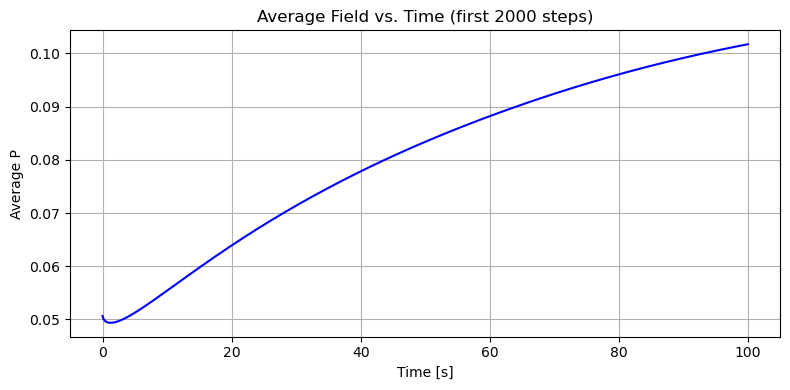

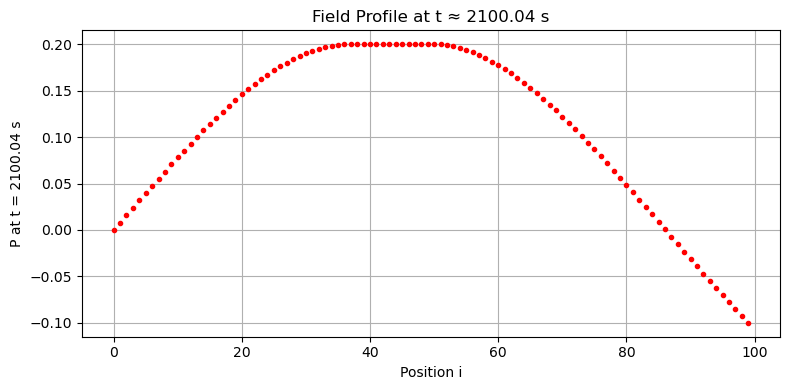

In [5]:
# Plot 1: Average field value vs. time (first 2000 steps)
plt.figure(figsize=(8, 4))
mean_P = P[:2000, 1:-1].mean(axis=1)
plt.plot(t_vals[:2000], mean_P, color='blue')
plt.xlabel("Time [s]")
plt.ylabel("Average P")
plt.title("Average Field vs. Time (first 2000 steps)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Snapshot of spatial distribution at a later frame
frame_idx = 42000
plt.figure(figsize=(8, 4))
plt.plot(x_vals, P[frame_idx, :], 'r.')
plt.xlabel("Position i")
plt.ylabel("P at t = {:.2f} s".format(t_vals[frame_idx]))
plt.title("Field Profile at t ≈ {:.2f} s".format(t_vals[frame_idx]))
plt.grid(True)
plt.tight_layout()
plt.show()